In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# EDA

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(f'Count of comlumns: {len(df.columns)}')
print(f'All columns: {df.columns}')

Count of comlumns: 12
All columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Sex encoding

For male we take 0  

For female we take 1

In [8]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [9]:
df['Sex_enc'] = df['Sex'].replace({'male': 0, 'female':1})
df['Sex_enc']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_enc, Length: 891, dtype: int64

## Port of Embarkation
C = Cherbourg (1), Q = Queenstown (2), S = Southampton (3)  


In [10]:
df['embarked_encoded'] = df['Embarked'].replace({'C': 1, 'Q': 2, 'S': 3})

## Cabin

In [11]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## Ticket

In [12]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

## Correlation Matrix

In [13]:
# I only want columns with numeric values for the correlation matrix
numerics = ['PassengerId', 'Survived', 'Pclass', 'Sex_enc', 'Age', 'SibSp',
       'Parch', 'Fare', 'embarked_encoded']
corr_matrix = df[numerics].corr()

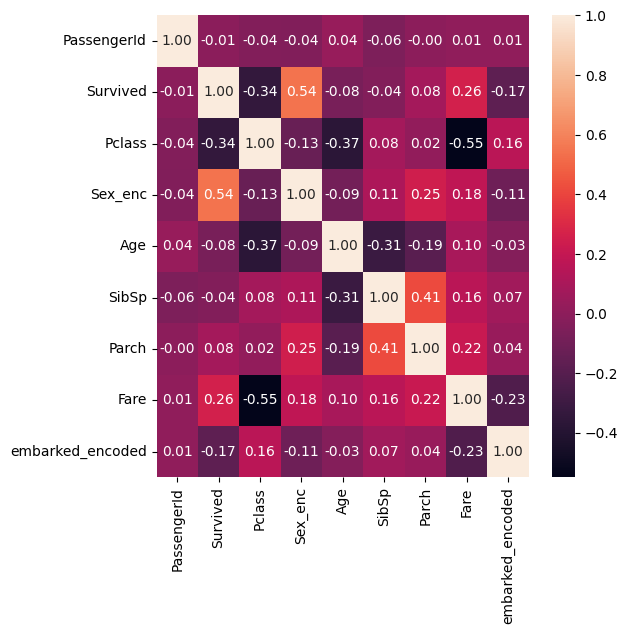

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap der Korrelationsmatrix
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

The most relevant features seem to be "Fare","Sex_enc" and "Pclass"
Lets plot them to get a better overview

In [27]:
countSurvivedMale = df.loc[(df['Sex'] == 'male')& (df['Survived'] == 1), 'Survived'].count()
countSurvivedFemale = df.loc[(df['Sex'] == 'female')& (df['Survived'] == 1), 'Survived'].count()

countDeadMale = df.loc[(df['Sex'] == 'male')& (df['Survived'] == 0), 'Survived'].count()
countDeadFemale = df.loc[(df['Sex'] == 'female')& (df['Survived'] == 0), 'Survived'].count()

print(countDeadFemale)


81


In [49]:
countMale = df.loc[(df['Sex'] == 'male'), 'Survived'].count()
countFemale = df.loc[(df['Sex'] == 'female'), 'Survived'].count()

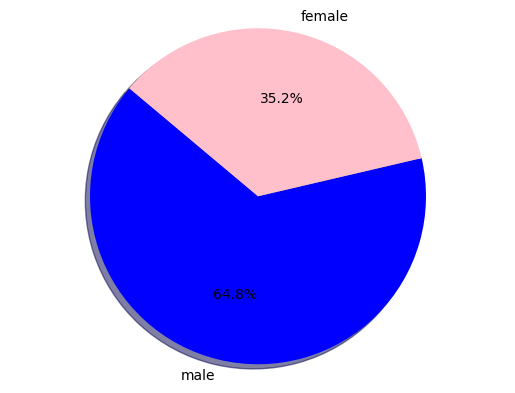

In [50]:
labels = ['male',  'female']
sizes = [countMale, countFemale]
colors = ['blue', 'pink']


# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

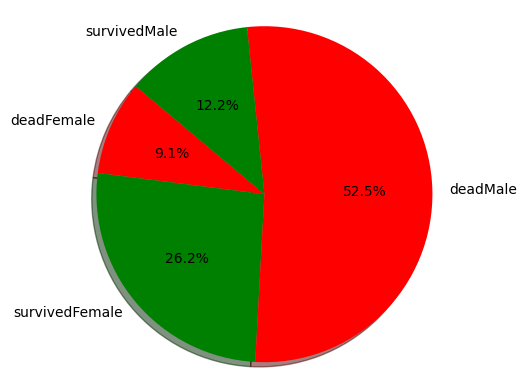

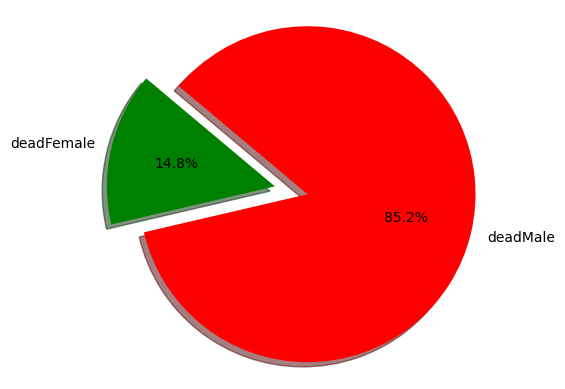

In [58]:
labels = ['deadFemale',  'survivedFemale', 'deadMale', 'survivedMale']
sizes = [countDeadFemale, countSurvivedFemale, countDeadMale, countSurvivedMale]
colors = ['red', 'green', 'red', 'green']
explode = (0, 0, 0, 0)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal') 

# Display the pie chart
plt.show()

labels = ['deadFemale',  'deadMale']
sizes = [countDeadFemale, countDeadMale]
colors = ['green', 'red']
explode = (0.1, 0.1)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal') 

# Display the pie chart
plt.show()

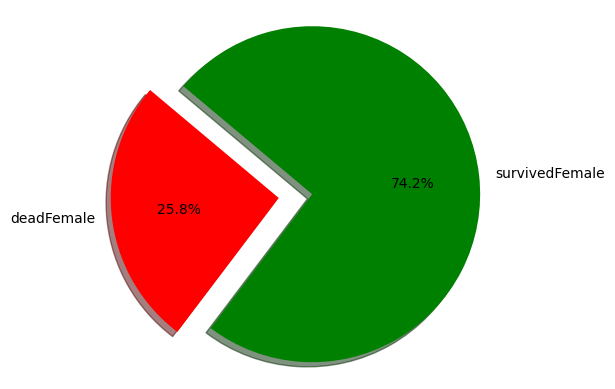

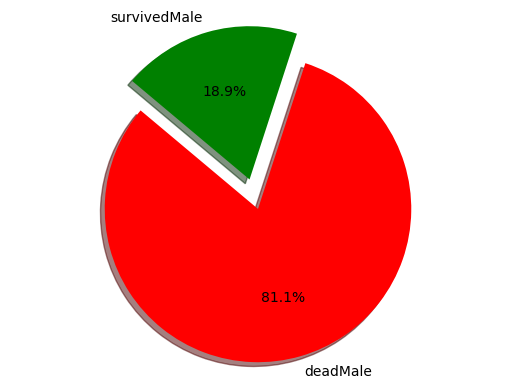

In [62]:
labels = ['deadFemale',  'survivedFemale']
sizes = [countDeadFemale, countSurvivedFemale]
colors = ['red', 'green']
explode = (0.1, 0.1)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal') 

# Display the pie chart
plt.show()

labels = ['deadMale',  'survivedMale']
sizes = [countDeadMale, countSurvivedMale]
colors = ['red', 'green']
explode = (0.1, 0.1)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal') 

# Display the pie chart
plt.show()